In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [58]:
resolution = 10

sx = 5
sy = 60
cell = mp.Vector3(sx,sy,0)

dpml = 1.0
pml_layers = [mp.PML(dpml)]
pad = 4  # padding distance between waveguide and cell edge


In [59]:
fcen = 0.02  # pulse center frequency
df = 0.001    # pulse width (in frequency)
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ez,
                     center=mp.Vector3(0,29,0),
                     size=mp.Vector3(3,0,0))]

In [60]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)

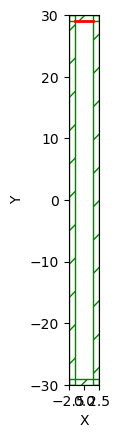

In [61]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()

In [62]:
nfreq = 100  # number of frequencies at which to compute flux

# reflected flux
refl_fr = mp.FluxRegion(center=mp.Vector3(0,27,0), size=mp.Vector3(0,3,0))
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

# transmitted flux
tran_fr = mp.FluxRegion(center=mp.Vector3(0,-27,0), size=mp.Vector3(0,3,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

In [63]:
pt = mp.Vector3(0,-26.5,0)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))

# for normalization run, save flux fields data for reflection plane
straight_refl_data = sim.get_flux_data(refl)
# save incident power for transmission plane
straight_tran_flux = mp.get_fluxes(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 0.004673 s
Working in 2D dimensions.
Computational cell is 5 x 60 x 0 with resolution 10
time for set_epsilon = 0.0345101 s
-----------
field decay(t = 50.050000000000004): 4.907013597082026e-50 / 4.907013597082026e-50 = 1.0
field decay(t = 100.05000000000001): 1.2902126555942644e-13 / 1.2902126555942644e-13 = 1.0
field decay(t = 150.1): 4.18955204021924e-14 / 1.2902126555942644e-13 = 0.3247179464605047
field decay(t = 200.15): 6.841829281741564e-14 / 1.2902126555942644e-13 = 0.5302869454950632
field decay(t = 250.20000000000002): 1.016182668140752e-13 / 1.2902126555942644e-13 = 0.7876086656991472
field decay(t = 300.2): 1.529643190105439e-13 / 1.529643190105439e-13 = 1.0
field decay(t = 350.25): 2.4876166812631404e-13 / 2.4876166812631404e-13 = 1.0
field decay(t = 400.3): 3.894440596215586e-13 / 3.894440596215586e-13 = 1.0
field decay(t = 450.35): 6.101329772082814e-13 / 6.101329772082814e-13 = 1.0
field decay(t = 5

     block, center = (0,25,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.71,5.71,5.71)
     block, center = (0,20,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.83,1.83,1.83)
     block, center = (0,15,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.71,5.71,5.71)
     block, center = (0,10,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.83,1.83,1.83)
     block, center = (0,5,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.71,5.71,5.71)
     block, center = (0,0,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.83,1.83,

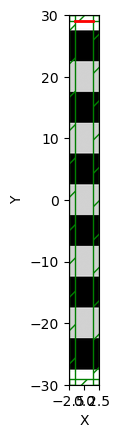

In [64]:
sim.reset_meep()

geometry = [mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,25,0), material=mp.Medium(epsilon=5.71)),
            mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,20,0), material=mp.Medium(epsilon=1.83)),
            mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,15,0), material=mp.Medium(epsilon=5.71)),
            mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,10,0), material=mp.Medium(epsilon=1.83)),
            mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,5,0), material=mp.Medium(epsilon=5.71)),
            mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,0,0), material=mp.Medium(epsilon=1.83)),
            mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,-5,0), material=mp.Medium(epsilon=5.71)),
            mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,-10,0), material=mp.Medium(epsilon=1.83)),
            mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,-15,0), material=mp.Medium(epsilon=5.71)),
            mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,-20,0), material=mp.Medium(epsilon=1.83)),
            mp.Block(mp.Vector3(mp.inf,5,mp.inf), center=mp.Vector3(0,-25,0), material=mp.Medium(epsilon=5.71))]

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)


from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()

In [65]:
# reflected flux
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

tran_fr = mp.FluxRegion(center=mp.Vector3(0,-27,0), size=mp.Vector3(0,3,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

# for normal run, load negated fields to subtract incident from refl. fields
sim.load_minus_flux_data(refl, straight_refl_data)

pt = mp.Vector3(0,-26.5,0)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

bend_refl_flux = mp.get_fluxes(refl)
bend_tran_flux = mp.get_fluxes(tran)

flux_freqs = mp.get_flux_freqs(refl)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00124812 s
Working in 2D dimensions.
Computational cell is 5 x 60 x 0 with resolution 10
     block, center = (0,25,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.71,5.71,5.71)
     block, center = (0,20,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.83,1.83,1.83)
     block, center = (0,15,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.71,5.71,5.71)
     block, center = (0,10,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.83,1.83,1.83)
     block, center = (0,5,0)
          size (1e+20,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.71,5.71,5.71)


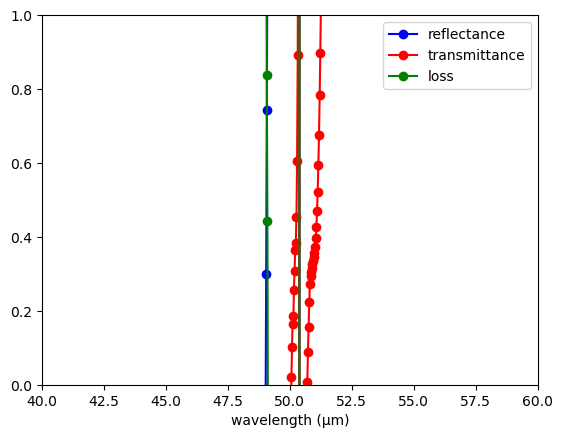

In [68]:
wl = []
Rs = []
Ts = []
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-bend_refl_flux[i]/straight_tran_flux[i])
    Ts = np.append(Ts,bend_tran_flux[i]/straight_tran_flux[i])

if mp.am_master():
    plt.figure()
    plt.plot(wl,Rs,'bo-',label='reflectance')
    plt.plot(wl,Ts,'ro-',label='transmittance')
    plt.plot(wl,1-Rs-Ts,'go-',label='loss')
    plt.axis([40, 60, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()